In [1]:
import json
import matplotlib.pyplot as plt
import numpy as np



In [2]:
MCDO_fp = '../src_MCDO/results/'
BASE_fp = '../src_deep_ensemble/results/'
DE_fp = '../src_deep_ensemble/results_per_model/'
VI_fp = '../src_variational_inference/results/'
sample_sizes = [1, 5, 10, 50, 100, 2000, 4000]

accuracy_data = {
    'MCDO': {},
    'BASE': {},
    'DE': {},
    'VI': {}
}

# Read data for each method and sample size and save to dictionary
for size in sample_sizes:
    with open(MCDO_fp + f'svhn_results_{size}_samples_mcdo.json') as f:
        accuracy_data['MCDO'][str(size)] = json.load(f)['accuracy']
    with open(BASE_fp + f'svhn_results_{size}_samples.json') as f:
        accuracy_data['BASE'][str(size)] = json.load(f)['accuracy']
    with open(VI_fp + f'svhn_results_{size}_samples_VI.json') as f:
        accuracy_data['VI'][str(size)] = json.load(f)['accuracy']

    
# Deep Ensemble
for size in sample_sizes:
    # Create list if it doesn't exist
    if not str(size) in accuracy_data['DE']:
        accuracy_data['DE'][str(size)] = []

    for model_itr in range(1, 6):
        with open(DE_fp + f'svhn_results_{size}_samples_model_{model_itr}.json') as f:
            accuracy_data['DE'][str(size)].append(json.load(f)['accuracy'])

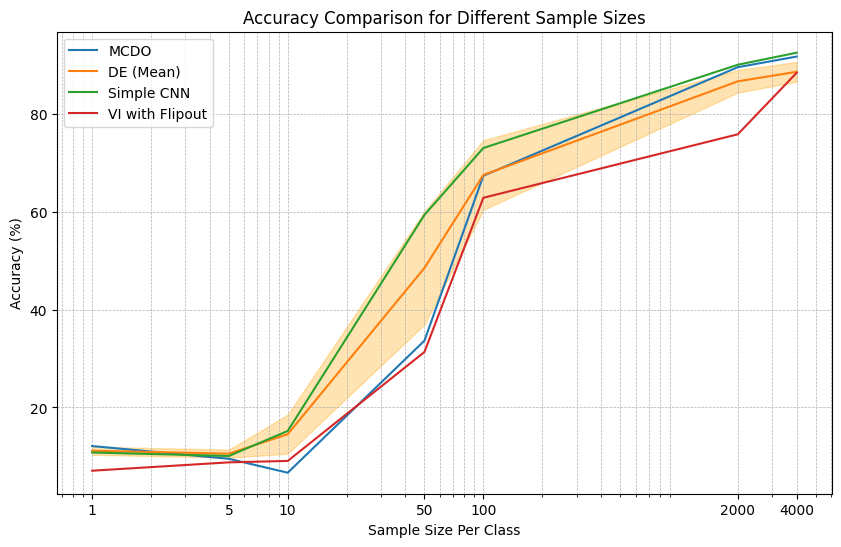

In [3]:
# Extract sample sizes
sample_sizes = [1, 5, 10, 50, 100, 2000, 4000]

model_0_accuracies = [accuracy_data["BASE"][str(size)] for size in sample_sizes]
# Model 1 accuracies
model_1_accuracies = [accuracy_data["MCDO"][str(size)] for size in sample_sizes]

# Model 2 accuracies (mean and standard deviation)
model_2_means = []
model_2_stds = []

for size in sample_sizes:
    model_2_values = accuracy_data["DE"][str(size)]
    model_2_means.append(np.mean(model_2_values))
    model_2_stds.append(np.std(model_2_values))

# Calculate confidence intervals for Model 2
model_2_upper = np.array(model_2_means) + 2 * np.array(model_2_stds)
model_2_lower = np.array(model_2_means) - 2 * np.array(model_2_stds)

model_3_accuracies = [accuracy_data["VI"][str(size)] for size in sample_sizes]

# Plotting
plt.figure(figsize=(10, 6))


# Plot Model 1
plt.plot(sample_sizes, model_1_accuracies, label='MCDO', linestyle='-')

# Plot Model 2 mean
plt.plot(sample_sizes, model_2_means, label='DE (Mean)', linestyle='-')

plt.plot(sample_sizes, model_0_accuracies, label='Simple CNN', linestyle='-')

plt.plot(sample_sizes, model_3_accuracies, label='VI with Flipout', linestyle='-')


# Add confidence interval as shaded area for Model 2
plt.fill_between(sample_sizes, model_2_lower, model_2_upper, color='orange', alpha=0.3)

# Add labels, title, and legend
plt.xlabel("Sample Size Per Class")
plt.ylabel("Accuracy (%)")
plt.title("Accuracy Comparison for Different Sample Sizes")
plt.xscale("log")  # Use log scale for better visualization
plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.legend()
plt.xticks(sample_sizes, labels=sample_sizes)

# Save and show the plot
plt.savefig("accuracy_plot.png", dpi=300, bbox_inches='tight')
plt.show()